## Installing Dependencies

In [39]:
# Install Neural Prophet
!pip install neuralprophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Preprocessing
- Keeping only the Date and AQI columns

In [40]:
df = pd.read_csv('/content/AdilabadUrban22.csv')

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)
df.info()

df2 = pd.read_csv('/content/adilabad_101.csv')
df2.drop_duplicates(subset=['date'], inplace=True)
df2.info()

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df2 = df2[['date','max_temp']]
df2.drop_duplicates(subset=['date'], inplace=True)

df2.info()

df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')

WARNING - (py.warnings._showwarnmsg) - <ipython-input-40-ae4d8584329a>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')

  df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      337 non-null    object 
 1   max_temp  337 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     365 non-null    int64  
 1   date           365 non-null    object 
 2   location       365 non-null    object 
 3   min_temp       365 non-null    float64
 4   max_temp       365 non-null    float64
 5   min_humidity   365 non-null    float64
 6   max_humidity   365 non-null    float64
 7   min_windspeed  0 non-null      float64
 8   max_windspeed  0 non-null      float64
 9   rain           365 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3

In [41]:
df = pd.concat([df2, df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      702 non-null    object 
 1   max_temp  702 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [42]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      702 non-null    datetime64[ns]
 1   y       702 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.5 KB


## Normalising the data - MinMax Scaling

In [43]:
# Data normalisation - Change the AQI into 0-1 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = df['y'].values.reshape(-1, 1)
# fit the scaler to the data and transform it
scaled_values = scaler.fit_transform(values)
# assign the transformed data to the original column
df['y'] = scaled_values 

In [44]:
# Save the scaler values for forecast later
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

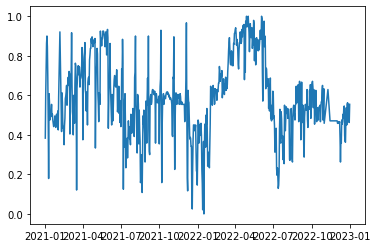

In [45]:
plt.plot(df['ds'], df['y'])
plt.show()

In [46]:
df

,ds,y
0,2021-01-01,0.383333
1,2021-01-02,0.600000
2,2021-01-03,0.716667
3,2021-01-04,0.862500
4,2021-01-05,0.900000
...,...,...
697,2022-12-27,0.466667
698,2022-12-28,0.554167
699,2022-12-29,0.554167
700,2022-12-30,0.462500


In [47]:
#define the model and parameters
from neuralprophet import NeuralProphet
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=4,
    yearly_seasonality=4,
    weekly_seasonality=False,
    daily_seasonality=False,

)
#metrics = m.fit(df, freq="D")
#forecast = m.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.43% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.43% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.845% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.845% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equ

Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

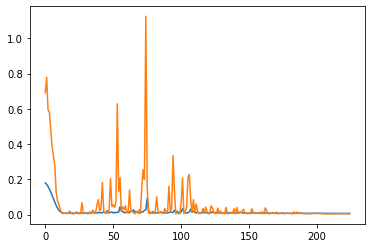

In [48]:
# Train-Test Split and,Train the model
df_train, df_test = m.split_df(df, freq="D", valid_p=1.0 / 12)
metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [49]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
224,0.071012,0.085116,0.004272,0.0,224,0.090907,0.120612,0.006358,0.0


In [50]:
# import torch

# # ...

# # Save the model to a file
# torch.save(m.model.state_dict(), 'model.pth')

In [51]:
# model = NeuralProphet(
#     n_changepoints=100,
#     trend_reg=2,
#     yearly_seasonality=3,
#     weekly_seasonality=3,
#     daily_seasonality=False
# )
# torch.load('model.pth')
# model.model.load_state_dict(torch.load('model.pth'))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.845% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.845% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.845% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.845% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


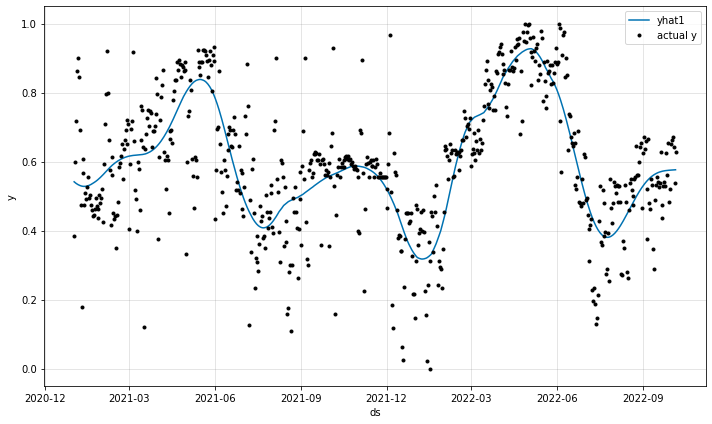

In [52]:
forecast_train = m.predict(df_train)
fig = m.plot(forecast_train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.103% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 93.103% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 93.103% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 93.103% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


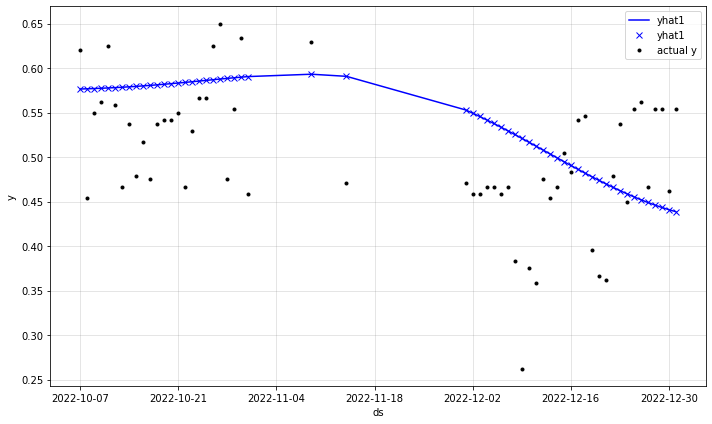

In [53]:
forecast_test = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_test[-7 * 24 :])

In [54]:
df_test
t1_actual = scaler.inverse_transform([df_test['y']])
print(t1_actual)

[[36.2 32.2 34.5 34.8 36.3 34.7 32.5 34.2 32.8 33.7 32.7 34.2 34.3 34.3
  34.5 32.5 34.  34.9 34.9 36.3 36.9 32.7 34.6 36.5 32.3 36.4 32.6 32.6
  32.3 32.3 32.5 32.5 32.3 32.5 30.5 27.6 30.3 29.9 32.7 32.2 32.5 33.4
  32.9 34.3 34.4 30.8 30.1 30.  32.8 34.2 32.1 34.6 34.8 32.5 34.6 34.6
  32.4 34.6]]


In [55]:
#forecast
t1_pred= scaler.inverse_transform([forecast_test['yhat1']])
print(t1_pred)

[[35.13757925 35.14363604 35.15037661 35.15788822 35.16623669 35.1754735
  35.18563299 35.19673805 35.20879011 35.221772   35.23565941 35.25040512
  35.2659462  35.28220539 35.29909115 35.3165019  35.33431177 35.35239058
  35.37059526 35.38877277 35.40675144 35.42436247 35.44142275 35.45774345
  35.4731286  35.53637009 35.47932415 34.57357149 34.48680954 34.39710217
  34.30465536 34.20970516 34.11248903 34.01326447 33.91230469 33.80989008
  33.70631247 33.60187941 33.49690275 33.39169722 33.2865911  33.18191342
  33.07799892 32.97517591 32.87378483 32.77415614 32.67662315 32.58150916
  32.4891346  32.39981489 32.31385617 32.23155026 32.1531847  32.07902913
  32.00934319 31.94436793 31.88433223 31.82944565]]


In [56]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(t1_actual, t1_pred) #transformed values

0.05250043694693709

In [57]:
mean_absolute_percentage_error(df_test['y'], forecast_test['yhat1'])

0.157466546410238

In [58]:
print(len(t1_actual[0]), len(t1_pred[0]))

58 58


In [59]:
# Compare the predicted value vs actual value
data = {'actual': t1_actual[0], 'prediction': t1_pred[0]}
# create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

In [60]:
df = pd.read_csv('/content/AdilabadUrban22.csv')
df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      337 non-null    datetime64[ns]
 1   y       337 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [61]:
import pickle
pkl_path = "/content/model.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)



In [62]:
# Forecast for more days
future = m.make_future_dataframe(df, periods=1500)
forecast_more_years = m.predict(future)
forecast_more_years

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.813% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.813% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 41it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.436662,0.573865,-0.137203
1,2023-01-02,None,0.434828,0.573847,-0.139019
2,2023-01-03,None,0.433229,0.573828,-0.140599
3,2023-01-04,None,0.431873,0.573809,-0.141937
4,2023-01-05,None,0.430762,0.573791,-0.143028
...,...,...,...,...,...
1495,2027-02-04,None,0.472270,0.546152,-0.073882
1496,2027-02-05,None,0.476545,0.546133,-0.069588
1497,2027-02-06,None,0.480818,0.546115,-0.065296
1498,2027-02-07,None,0.485079,0.546096,-0.061017


In [63]:
# Save forecast
# save the dataframe
forecast_more_years.to_pickle("/content/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [64]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [65]:
fcast

,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.436662,0.573865,-0.137203
1,2023-01-02,None,0.434828,0.573847,-0.139019
2,2023-01-03,None,0.433229,0.573828,-0.140599
3,2023-01-04,None,0.431873,0.573809,-0.141937
4,2023-01-05,None,0.430762,0.573791,-0.143028
...,...,...,...,...,...
1495,2027-02-04,None,0.472270,0.546152,-0.073882
1496,2027-02-05,None,0.476545,0.546133,-0.069588
1497,2027-02-06,None,0.480818,0.546115,-0.065296
1498,2027-02-07,None,0.485079,0.546096,-0.061017


In [66]:
extract_ds=forecast_more_years['ds']
df_extract_ds=pd.DataFrame(extract_ds)
df_extract_ds

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1495,2027-02-04
1496,2027-02-05
1497,2027-02-06
1498,2027-02-07


In [67]:
#forecast
final_forecast= scaler.inverse_transform([forecast_more_years['yhat1']])
print(final_forecast)

[[31.77989988 31.73586874 31.69750528 ... 32.83963995 32.94189363
  33.04353933]]


In [68]:
df = pd.DataFrame(final_forecast[0],)
df

,0
0,31.779900
1,31.735869
2,31.697505
3,31.664944
4,31.638298
...,...
1495,32.634480
1496,32.737069
1497,32.839640
1498,32.941894


In [69]:
merged_df = pd.concat([df_extract_ds,df], axis=1)
merged_df

,ds,0
0,2023-01-01,31.779900
1,2023-01-02,31.735869
2,2023-01-03,31.697505
3,2023-01-04,31.664944
4,2023-01-05,31.638298
...,...,...
1495,2027-02-04,32.634480
1496,2027-02-05,32.737069
1497,2027-02-06,32.839640
1498,2027-02-07,32.941894


In [70]:
merged_df.to_csv('/content/AdilabadUrbanMaxTpredict.csv')